In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
"""
Run this script to generate the data for the array
"""
import numpy as np
from scipy.constants import epsilon_0, hbar, k as k_B, pi
from scipy.special import ellipk
import scipy.optimize
import pandas as pd
import os
import random


def calc_caps(inductance = 16e-9, freqs=np.linspace(1e9,1.1e9,22)):
    caps = (1/(2*np.pi*freqs)**2)/(inductance)
    return caps

def interdigitated_capacitance(epsilon_r, area, width, gap):
    """
    Return the capacitance C of an interdigitated capacitor with the given surface area, tine width, and gap between
    tines; epsilon_r is the dielectric constant of the substrate. The formula is given in Jonas's MKID design memo. Note
    that all lengths and areas must use SI units (m and m^2) for the return value to be in farads.
    """
    pitch = width + gap
    k = np.tan(pi * width / (4 * pitch))**2
    K = ellipk(k**2)
    Kp = ellipk(1 - k**2)
    C = epsilon_0 * (1 + epsilon_r) * (area / pitch) * (K / Kp)
    return C


def calc_idc_area(capacitance, epsilon_r, width, gap):
    def objective(area):
        return interdigitated_capacitance(epsilon_r,area,width,gap) - capacitance
    return scipy.optimize.fsolve(objective,x0=100e-6*100e-6)

def calc_cap_lengths_from_cap(caps,width=8e-6,gap=8e-6,cap_width=500e-6):
    areas = []
    for cap in caps:
        areas.append(calc_idc_area(cap,epsilon_r=11.9,width=width,gap=gap))
    areas = np.array(areas)
    lengths = areas/cap_width
    return lengths

def calc_cap_lengths(inductance,freqs,width=8e-6,gap=8e-6,cap_width=500e-6):
    caps = calc_caps(inductance,freqs)
    if np.isscalar(gap):
        gap = gap*np.ones(freqs.shape)
    if np.isscalar(width):
        width = width*np.ones(freqs.shape)
    areas = []
    for (cap,this_gap,this_width) in zip(caps,gap,width):
        areas.append(calc_idc_area(cap,epsilon_r=11.9,width=this_width,gap=this_gap))
    areas = np.array(areas).squeeze()
    print areas.shape
    lengths = areas/cap_width
    return lengths

def geometric_spacing(low,high,num):
    return low*(high/low)**(np.arange(num,dtype='float')/(num-1))

def uniform_length_spacing(low,high,num):
    lengths = np.linspace(1/np.sqrt(high), 1/np.sqrt(low), num)
    return lengths[::-1]**-2

In [154]:
f_low = 122.e6
f_hi = 155e6
freqs_b = uniform_length_spacing(f_low,f_hi,9)
freqs_a = uniform_length_spacing(160e6,200e6,9)


In [175]:
freqs_a


array([  1.60000000e+08,   1.64308000e+08,   1.68792361e+08,
         1.73462842e+08,   1.78329888e+08,   1.83404685e+08,
         1.88699229e+08,   1.94226390e+08,   2.00000000e+08])

In [155]:
freqs

array([  1.22000000e+08,   1.25515042e+08,   1.29184215e+08,
         1.33016662e+08,   1.37022216e+08,   1.41211463e+08,
         1.45595808e+08,   1.50187556e+08,   1.55000000e+08])

In [156]:
calc_cap_lengths(33.5e-9,freqs_b,cap_width=7400.e-6)/16e-6

(9,)


array([ 120.20862524,  113.57002914,  107.21027068,  101.12143042,
         95.29570299,   89.72539712,   84.40293565,   79.32085548,
         74.47180762])

In [157]:
turns_a = np.floor(calc_cap_lengths(19e-9,freqs_a,cap_width=7400.e-6)/16e-6).astype('int')

(9,)


In [183]:
turns_b = np.floor(calc_cap_lengths(33.5e-9,freqs_b,cap_width=7400.e-6)/16e-6).astype('int')

(9,)


In [194]:
turns_b

array([120, 113, 107, 101,  95,  89,  84,  79,  74])

In [195]:
turns_a

array([123, 116, 110, 104,  99,  93,  88,  83,  78])

In [184]:
lengths = 7400 - np.arange(np.ceil(256/8.))*11

In [185]:
areas_a = np.outer(turns_a,lengths)*1e-6*16e-6
areas_b = np.outer(turns_b,lengths)*1e-6*16e-6

In [186]:
caps_a = interdigitated_capacitance(11.9,area=areas_a,width=8e-6,gap=8e-6)
caps_b = interdigitated_capacitance(11.9,area=areas_b,width=8e-6,gap=8e-6)

In [187]:
actual_freq_a = 1/(2*np.pi*np.sqrt(caps_a*19e-9))
actual_freq_b = 1/(2*np.pi*np.sqrt(caps_b*33.5e-9))

(0, 1000000.0)

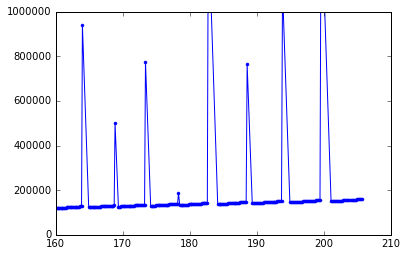

In [188]:
plot(actual_freq_a.flatten()[:-1]/1e6,np.diff(actual_freq_a.flatten()),'.-')
ylim(0,1e6)

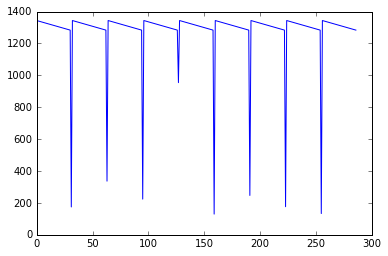

In [189]:
plot(actual_freq_a.flatten()[:-1]/np.diff(actual_freq_a.flatten()))

(0, 1000000.0)

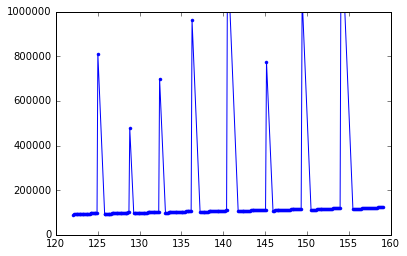

In [190]:
plot(actual_freq_b.flatten()[:-1]/1e6,np.diff(actual_freq_b.flatten()),'.-')
ylim(0,1e6)

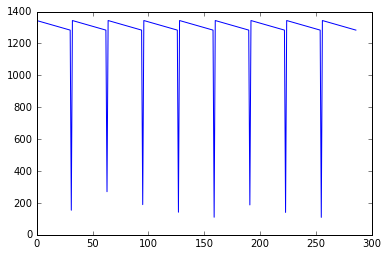

In [191]:
plot(actual_freq_b.flatten()[:-1]/np.diff(actual_freq_b.flatten()))

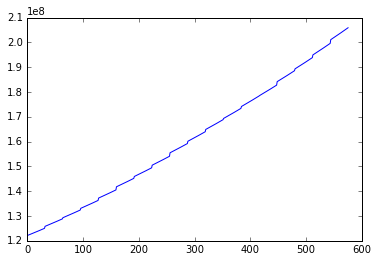

In [193]:
plot(np.hstack((actual_freq_b.flatten(),actual_freq_a.flatten())))

In [196]:
actual_freq_a.shape

(9, 32)

In [164]:
lengths

array([ 7400.,  7389.,  7378.,  7367.,  7356.,  7345.,  7334.,  7323.,
        7312.,  7301.,  7290.,  7279.,  7268.,  7257.,  7246.,  7235.,
        7224.,  7213.,  7202.,  7191.,  7180.,  7169.,  7158.,  7147.,
        7136.,  7125.,  7114.,  7103.,  7092.,  7081.,  7070.,  7059.])

In [165]:
turns_a

array([123, 116, 110, 104,  99,  93,  88,  83,  78])

In [143]:
np.product(actual_freq_a.shape)

288

In [41]:
calc_cap_lengths(19e-9,freqs_a,cap_width=89*16e-6)

(9,)


array([ 0.01024586,  0.00971563,  0.00920625,  0.00871717,  0.00824783,
        0.00779772,  0.00736628,  0.00695299,  0.00655735])

In [43]:
np.diff(np.linspace(6953,7400,9))

array([ 55.875,  55.875,  55.875,  55.875,  55.875,  55.875,  55.875,
        55.875])

In [ ]:
turns = np.floor()